In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student-por.csv', sep=";")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Let's break down the meaning of each column in your dataset:

*   **school**: Student's school (GP - Gabriel Pereira or MS - Mousinho da Silveira)
*   **sex**: Student's sex (F - female or M - male)
*   **age**: Student's age (from 15 to 22)
*   **address**: Student's home address type (U - urban or R - rural)
*   **famsize**: Family size (LE3 - less or equal to 3 or GT3 - greater than 3)
*   **Pstatus**: Parent's cohabitation status (T - living together or A - apart)
*   **Medu**: Mother's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education)
*   **Fedu**: Father's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education)
*   **Mjob**: Mother's job (at_home, health, other, services, teacher)
*   **Fjob**: Father's job (at_home, health, other, services, teacher)
*   **reason**: Reason to choose this school (home, reputation, course, other)
*   **guardian**: Student's guardian (mother, father, other)
*   **traveltime**: Home to school travel time (1 - <15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, 4 - >1 hour)
*   **studytime**: Weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours)
*   **failures**: Number of past class failures (n if 1<=n<3, else 4)
*   **schoolsup**: Extra educational support (yes or no)
*   **famsup**: Family educational support (yes or no)
*   **paid**: Extra paid classes within the course subject (yes or no)
*   **activities**: Extra-curricular activities (yes or no)
*   **nursery**: Attended nursery school (yes or no)
*   **higher**: Wants to take higher education (yes or no)
*   **internet**: Internet access at home (yes or no)
*   **romantic**: With a romantic relationship (yes or no)
*   **famrel**: Quality of family relationships (1 - very bad to 5 - excellent)
*   **freetime**: Free time after school (1 - very low to 5 - very high)
*   **goout**: Going out with friends (1 - very low to 5 - very high)
*   **Dalc**: Workday alcohol consumption (1 - very low to 5 - very high)
*   **Walc**: Weekend alcohol consumption (1 - very low to 5 - very high)
*   **health**: Current health status (1 - very bad to 5 - very good)
*   **absences**: Number of school absences (from 0 to 93)
*   **G1**: First period grade (numeric from 0 to 20)
*   **G2**: Second period grade (numeric from 0 to 20)
*   **G3**: Final grade (numeric from 0 to 20)

In [5]:
from scipy.stats import f_oneway
gp_g3 = df[df['school']=='GP']['G3']
ms_g3 = df[df['school']=='MS']['G3']

f_statistic, p_value = f_oneway(gp_g3, ms_g3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("We accept the null hypotheses")
else:
    print("We reject the null hypotheses.")

F-statistic: 56.890676863371326
P-value: 1.5661990923002604e-13
We reject the null hypotheses.


<Axes: xlabel='school', ylabel='G3'>

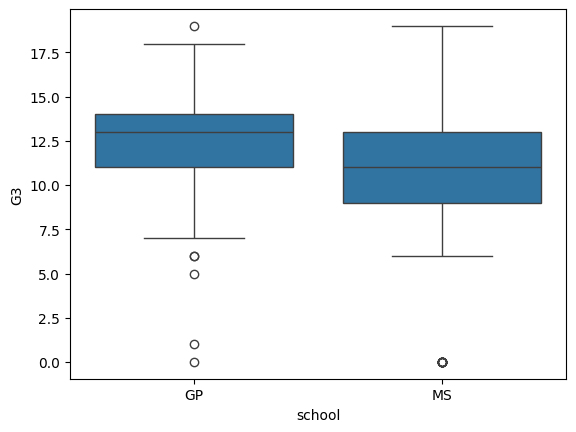

In [6]:
sns.boxplot(x = "school", y = 'G3', data = df)

In [7]:
from scipy.stats import f_oneway

female_g3 = df[df['sex']=='F']['G3']
male_g3 = df[df['sex']=='M']['G3']

f_statistic_sex, p_value_sex = f_oneway(female_g3, male_g3)

print(f"F-statistic for sex: {f_statistic_sex}")
print(f"P-value for sex: {p_value_sex}")

if p_value_sex > 0.05:
    print("For sex, we accept the null hypothesis (no significant difference).")
else:
    print("For sex, we reject the null hypothesis (significant difference).")

F-statistic for sex: 10.962308407124876
P-value for sex: 0.0009815287061373291
For sex, we reject the null hypothesis (significant difference).


<Axes: xlabel='sex', ylabel='G3'>

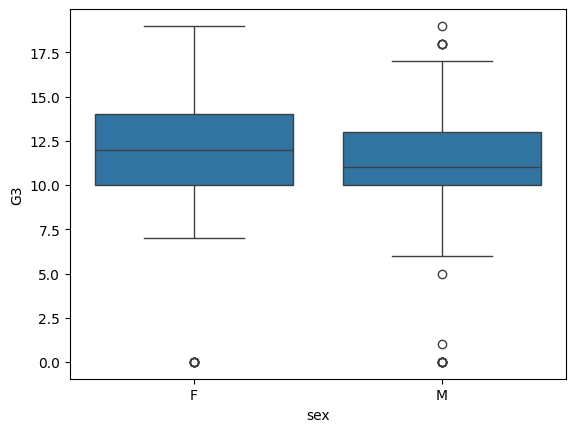

In [8]:
sns.boxplot(x = "sex", y = 'G3', data = df)

In [9]:
cor = df['age'].corr(df['G3'])
if abs(cor) > 0.5:
    print("There is a strong correlation between age and G3.")
elif abs(cor) > 0.3:
    print("There is a moderate correlation between age and G3.")
else:
    print("There is weak correlation")

There is weak correlation


<Axes: xlabel='age', ylabel='G3'>

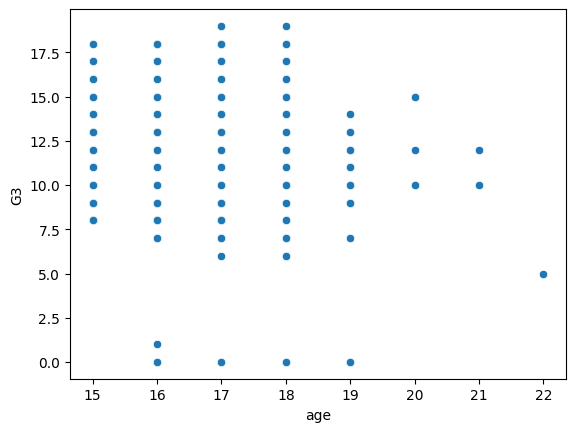

In [10]:
sns.scatterplot(x = 'age', y = 'G3', data = df)

In [11]:
categorical_features = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        # Consider numeric columns with less than 5 unique values as categorical
        if df[col].nunique() < 5:
            categorical_features.append(col)

print(f"Number of identified categorical features: {len(categorical_features)}")
print(f"Categorical features: {categorical_features}")

Number of identified categorical features: 20
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [12]:
from scipy.stats import f_oneway

def run_f_test_on_g3(dataframe, categorical_column):
    """
    Performs a one-way ANOVA (F-test) for a categorical column against the 'G3' column.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        categorical_column (str): The name of the categorical column to test.
    """
    if categorical_column not in dataframe.columns:
        print(f"Error: Column '{categorical_column}' not found in the DataFrame.")
        return

    print(f"\n--- Analyzing '{categorical_column}' vs 'G3' ---")

    # Get unique categories in the column
    categories = dataframe[categorical_column].unique()

    # Prepare grade data for each category
    g3_by_category = [dataframe[dataframe[categorical_column] == cat]['G3'] for cat in categories]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*g3_by_category)

    print(f"F-statistic for '{categorical_column}': {f_statistic}")
    print(f"P-value for '{categorical_column}': {p_value}")

    if p_value > 0.05:
        print("Conclusion: We accept the null hypothesis (no significant difference in G3 across categories).")
    else:
        print("Conclusion: We reject the null hypothesis (significant difference in G3 across categories).")

# List of categorical features provided by the user
categorical_features_to_test = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
    'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
]

# Apply the function to each categorical feature
for feature in categorical_features_to_test:
    run_f_test_on_g3(df, feature)


--- Analyzing 'school' vs 'G3' ---
F-statistic for 'school': 56.890676863371326
P-value for 'school': 1.5661990923002604e-13
Conclusion: We reject the null hypothesis (significant difference in G3 across categories).

--- Analyzing 'sex' vs 'G3' ---
F-statistic for 'sex': 10.962308407124876
P-value for 'sex': 0.0009815287061373291
Conclusion: We reject the null hypothesis (significant difference in G3 across categories).

--- Analyzing 'address' vs 'G3' ---
F-statistic for 'address': 18.707910527412754
P-value for 'address': 1.7641534609222376e-05
Conclusion: We reject the null hypothesis (significant difference in G3 across categories).

--- Analyzing 'famsize' vs 'G3' ---
F-statistic for 'famsize': 1.3137906447644496
P-value for 'famsize': 0.2521332216658235
Conclusion: We accept the null hypothesis (no significant difference in G3 across categories).

--- Analyzing 'Pstatus' vs 'G3' ---
F-statistic for 'Pstatus': 0.0003677569375753126
P-value for 'Pstatus': 0.984705825951084
Conclu

### Categorical Variables with Significant Impact on G3 (Final Grade)

Based on the F-test (one-way ANOVA) results, the following categorical variables show a statistically significant difference in `G3` across their categories (p-value < 0.05):

*   `school`
*   `sex`
*   `address`
*   `Mjob` (Mother's job)
*   `Fjob` (Father's job)
*   `reason` (Reason to choose this school)
*   `traveltime`
*   `studytime`
*   `failures`
*   `higher` (Wants to take higher education)
*   `internet`
*   `romantic`

In [16]:
def identify_non_categorical_numerical_features(dataframe):
    """
    Identifies numerical columns (int64 or float64) with 5 or more unique values.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.

    Returns:
        list: A list of names of non-categorical numerical features.
    """
    non_categorical_numerical_features = []
    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64'] and dataframe[col].nunique() >= 5:
            non_categorical_numerical_features.append(col)
    return non_categorical_numerical_features

# Call the function with df as the argument
non_categorical_numerical_features = identify_non_categorical_numerical_features(df)

# Print the list of identified features and their count
print(f"Number of non-categorical numerical features: {len(non_categorical_numerical_features)}")
print(f"Non-categorical numerical features (5+ unique values): {non_categorical_numerical_features}")

Number of non-categorical numerical features: 13
Non-categorical numerical features (5+ unique values): ['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [21]:
new_df = df[['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'higher', 'internet', 'romantic', 'age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [22]:
new_df

,school,sex,address,Mjob,Fjob,reason,traveltime,studytime,failures,higher,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,U,at_home,teacher,course,2,2,0,yes,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,U,at_home,other,course,1,2,0,yes,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,U,at_home,other,other,1,2,0,yes,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,U,health,services,home,1,3,0,yes,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,U,other,other,home,1,2,0,yes,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,services,other,course,1,3,1,yes,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,U,teacher,services,course,1,2,0,yes,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,U,other,other,course,2,2,0,yes,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,U,services,services,course,2,1,0,yes,...,2,4,5,3,4,2,6,10,10,10


In [27]:
object_cols_new_df = new_df.select_dtypes(include='object').columns
new_df_encoded = pd.get_dummies(new_df, columns=object_cols_new_df, drop_first=True)
new_df_encoded = new_df_encoded.astype(int)

In [28]:
display(new_df_encoded.head())

,traveltime,studytime,failures,age,Medu,Fedu,famrel,freetime,goout,Dalc,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,higher_yes,internet_yes,romantic_yes
0,2,2,0,18,4,4,4,3,4,1,...,0,0,0,1,0,0,0,1,0,0
1,1,2,0,17,1,1,5,3,3,1,...,0,1,0,0,0,0,0,1,1,0
2,1,2,0,15,1,1,4,3,2,2,...,0,1,0,0,0,1,0,1,1,0
3,1,3,0,15,4,2,3,2,2,1,...,0,0,1,0,1,0,0,1,1,1
4,1,2,0,16,3,3,4,3,2,1,...,0,1,0,0,1,0,0,1,0,0


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the new_df_encoded DataFrame, storing it in a new variable
new_df_scaled = pd.DataFrame(scaler.fit_transform(new_df_encoded), columns=new_df_encoded.columns)

In [30]:
print("Head of the scaled DataFrame (new_df_scaled):")
display(new_df_scaled.head())

Head of the scaled DataFrame (new_df_scaled):


,traveltime,studytime,failures,age,Medu,Fedu,famrel,freetime,goout,Dalc,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,higher_yes,internet_yes,romantic_yes
0,0.576718,0.083653,-0.374305,1.031695,1.310216,1.540715,0.072606,-0.171647,0.693785,-0.543555,...,-0.19168,-1.140797,-0.621894,4.126473,-0.545894,-0.353247,-0.53161,0.344914,-1.816043,-0.763496
1,-0.760032,0.083653,-0.374305,0.210137,-1.336039,-1.188832,1.119748,-0.171647,-0.157380,-0.543555,...,-0.19168,0.876580,-0.621894,-0.242338,-0.545894,-0.353247,-0.53161,0.344914,0.550648,-0.763496
2,-0.760032,0.083653,-0.374305,-1.432980,-1.336039,-1.188832,0.072606,-0.171647,-1.008546,0.538553,...,-0.19168,0.876580,-0.621894,-0.242338,-0.545894,2.830881,-0.53161,0.344914,0.550648,-0.763496
3,-0.760032,1.290114,-0.374305,-1.432980,1.310216,-0.278983,-0.974536,-1.123771,-1.008546,-0.543555,...,-0.19168,-1.140797,1.607991,-0.242338,1.831858,-0.353247,-0.53161,0.344914,0.550648,1.309764
4,-0.760032,0.083653,-0.374305,-0.611422,0.428131,0.630866,0.072606,-0.171647,-1.008546,-0.543555,...,-0.19168,0.876580,-0.621894,-0.242338,1.831858,-0.353247,-0.53161,0.344914,-1.816043,-0.763496
